# 1. 📈 Sélection du Problème - Analyse et Prédiction de données boursières à l'aide d'algorithmes Machine Learning

> La prévision boursière constitue un domaine de recherche important dans le domaine du Machine Learning. Les algorithmes d'apprentissage machine learning peuvent s'avérer d'une aide utile pour prédire le marché boursier. Ce travail pratique présente une mise en œuvre de l'analyse et de la prédiction de données de titres boursiers à l'aide d'algorithme de Machine Learning. 

Il se base sur la lecture des articles suivants :
> 1. https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/
> 2. https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm
---

# 2. 📤 Import des Librairies et collecte des 💾 Données

> Nous allons utiliser entre autres les librairies yahoo finance et pandas_datareader pour permettre d'effectuer le chargement des données boursières historiques pour les titres sur lesquels nous souhaitons pouvoir analyser et effectuer une prédiction du cours du prix de clôture.

> Les données qui seront collectées pour l'analyse sont les données de séries temporelles de 6 titres de bourses sélectionnés du Nasdaq ("APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "NVIDIA", "TSLA") sur une profondeur d'une année.

Les données contiennent les colonnes suivantes :
> * '`Date`': La date correspondant aux données du titre.
> * '`Open`': Le prix à l'ouverture du titre à la date donnée.
> * '`High`': Le prix le plus haut du titre à la date donnée.
> * '`Low`': Le prix le bas du titre à la date donnée.
> * '`Close`': Le prix à la clôture du titre à la date donnée.
> * '`Adj. Close`': Le prix à la clôture du titre à la date donnée ajusté avec les éventuels dividendes, splits ou autres événements survenus sur le titre. 
> * '`Volume`': Volume de titre échangé à la date donnée.
> * '`Company Name`': Le nom du titre.

> Afin de vérifier que les données ont bien été collectées nous affichons les 15 dernières entrées qui devraient correspondre aux données du titres "TSLA". 

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NVDA', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, NVDA, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "NVIDIA", "TSLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(15)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400,TSLA
2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200,TSLA
2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,TSLA
2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,TSLA
2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,TSLA
2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,TSLA
2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,TSLA
2024-07-31,227.899994,234.679993,226.789993,232.070007,232.070007,67497000,TSLA
2024-08-01,227.690002,231.869995,214.330002,216.860001,216.860001,83861900,TSLA


> Nous vérifions la description et infos des différents DataFrame collectés. Par exemple pour les titres "APPL" et "NVDA".

In [33]:
# Summary Stats AAPL
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,187.630318,189.393188,186.040876,187.795498,187.436852,6.057027e+07
std,16.356057,16.655121,15.936728,16.322655,16.468993,2.475981e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.244995,177.025002,173.660004,175.280006,174.800781,4.715335e+07
50%,184.220001,185.880005,182.460007,184.399994,184.120270,5.379050e+07
75%,193.639999,194.759995,192.204994,193.500000,193.081406,6.604875e+07
max,236.479996,237.229996,233.089996,234.820007,234.820007,2.464214e+08


In [34]:
# Summary Stats NVDA
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,74.525327,75.883904,72.937909,74.480454,74.473105,4.592167e+08
std,29.452985,30.088268,28.533938,29.279234,29.281961,1.523125e+08
min,40.450001,40.879002,39.230000,40.326000,40.317253,1.739110e+08
25%,47.341000,47.957500,46.360500,47.014000,47.001867,3.702750e+08
50%,70.073997,70.793999,67.734001,69.640999,69.632011,4.332980e+08
75%,92.386002,94.758999,90.547501,92.519997,92.512398,5.220506e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.156044e+09


In [35]:
# General info APPL
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-11 to 2024-08-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [36]:
# General info NVDA
NVDA.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-11 to 2024-08-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


# 3. 📊 Analyse, visualisation des données boursières et sélection du titre

Nous commençons par visualiser les graphiques affichant le prix de clôture ajusté pour l'ensemble des 6 titres sur une année.

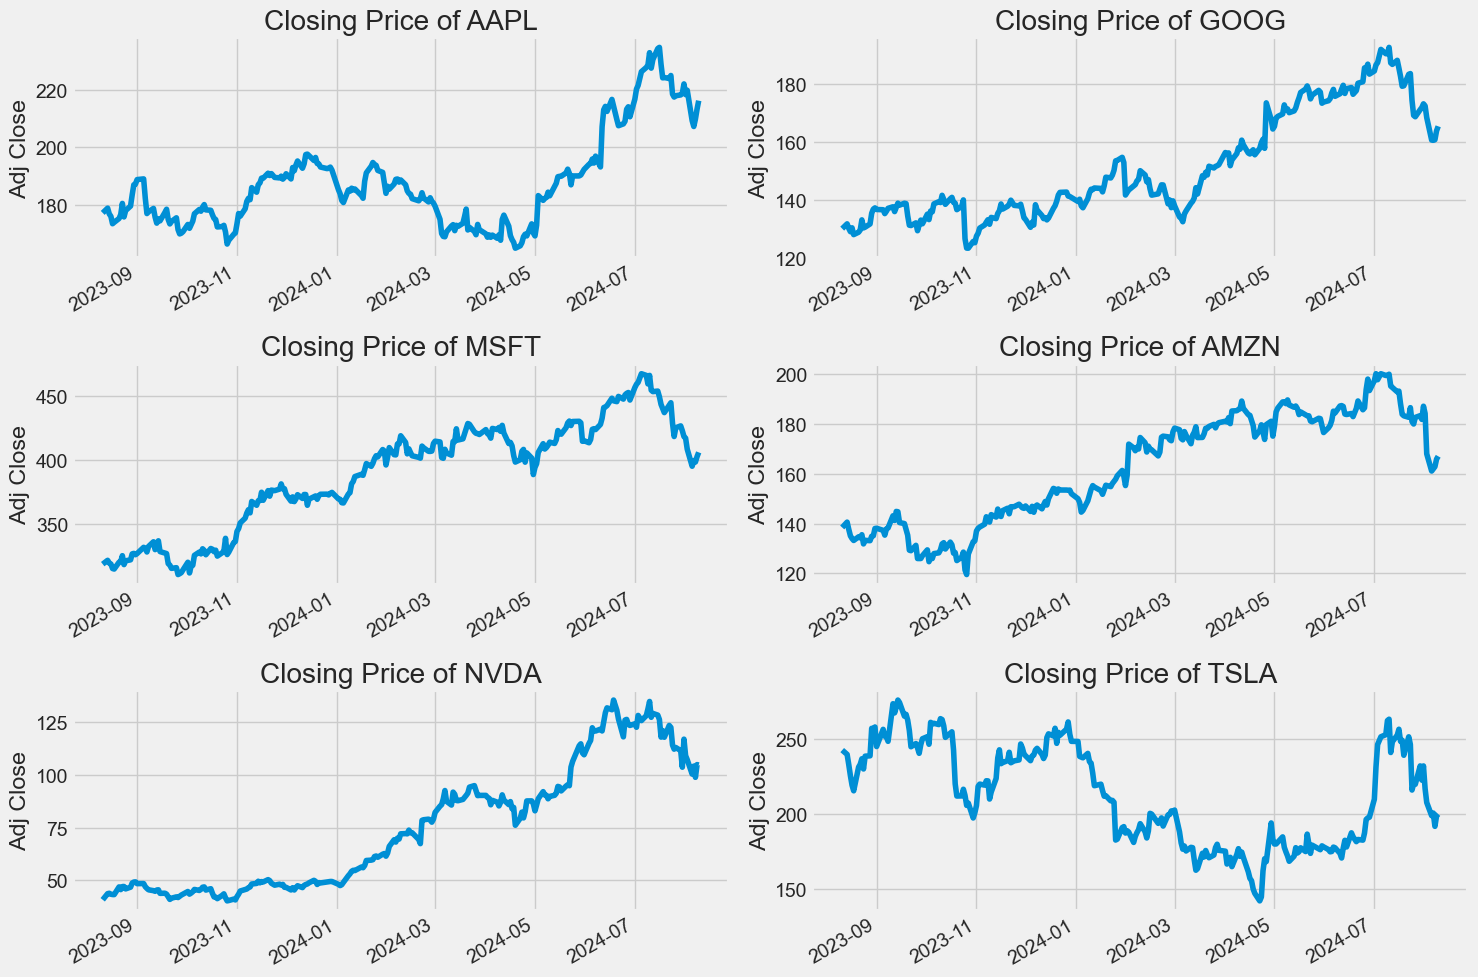

In [37]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Nous continuons par afficher le volume échangé pour l'ensemble des 6 titres sur une année. 

>Dans l’analyse technique, le volume mesure le nombre de titre qui sont négociées en bourse au cours d’une journée ou d’une période donnée. Le volume est important car il confirme les tendances.
Lorsque le cours du titre et le volume augmentent, cela montre que certains facteurs fondamentaux ou psychologiques influencent le cours de l’action.

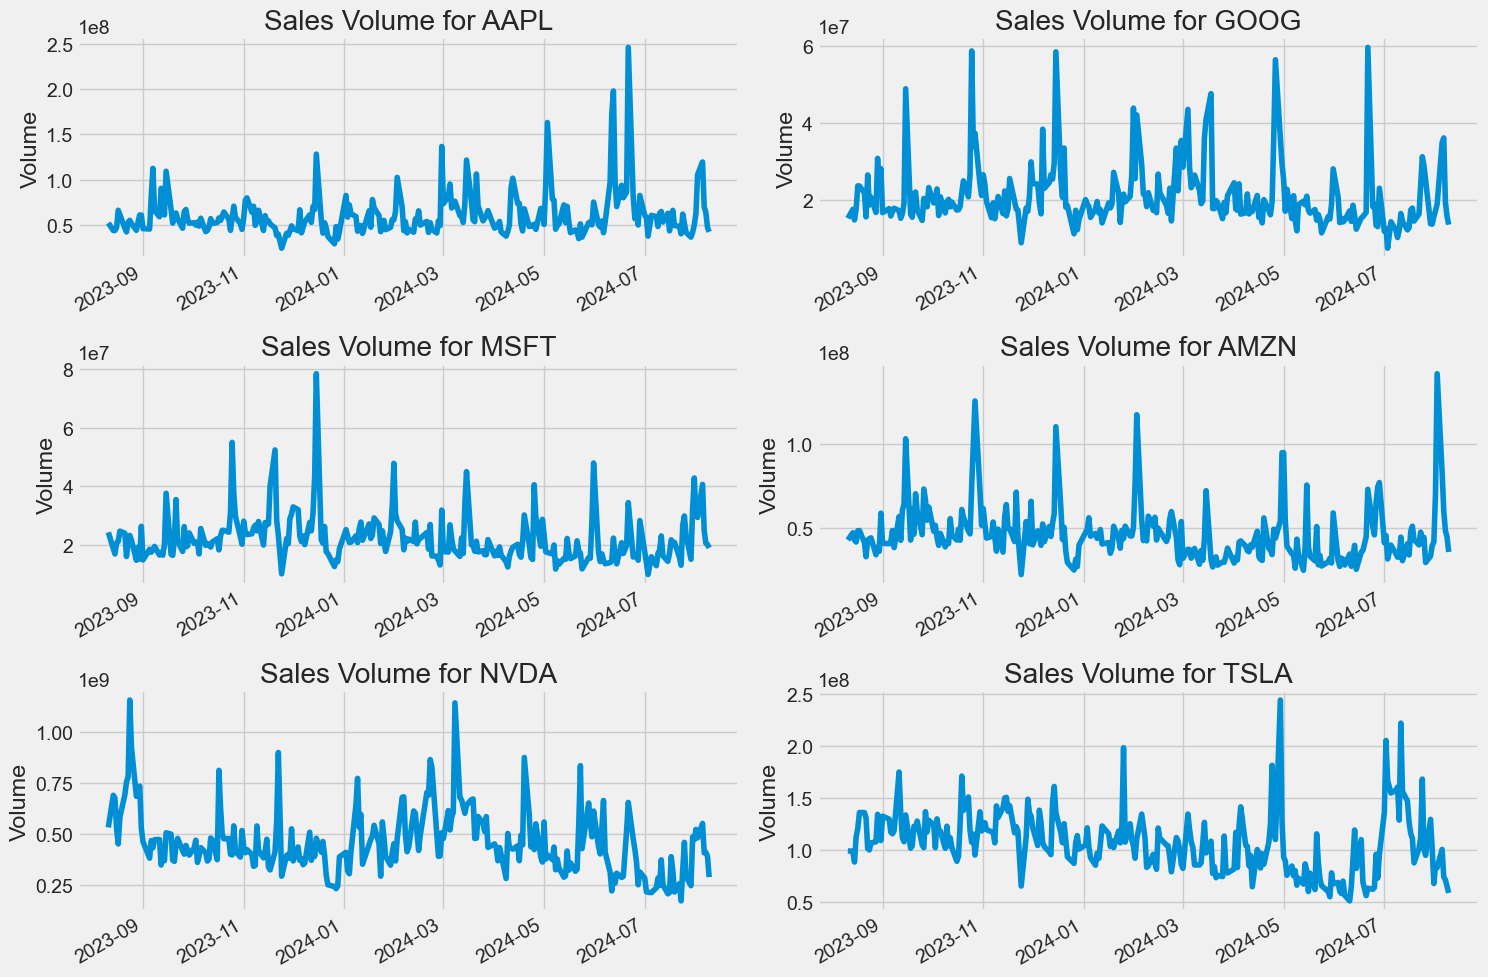

In [38]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

La moyenne mobile comme indicateur de tendance

>Dans le cadre de l’analyse technique sur l’évolution du prix des titres, les 3 moyennes mobiles de base les plus couramment utilisées sont la MMA20, la MMA50 et la MMA200, soit la mesure sur 20, 50 ou 200 périodes. 

>L'utilisation de moyennes mobiles sur différentes périodes vous permet d’obtenir des signaux d’achat et de vente qui varient selon la sensibilité de la moyenne mobile. Plus la période est élevée, moins la moyenne mobile est réactive face aux fluctuations du prix du titre.

>Une moyenne mobile sert à visualiser la valeur moyenne du cours de l’action sur une période de temps prédéterminée. Utilisées dans un contexte d’analyse technique, les moyennes mobiles sont des indicateurs de tendance, agissant également comme zone de support ou de résistance pour le prix de clôture ajusté d'un titre. En effet, on considère que lorsque le cours du titre traverse une moyenne mobile, il s’agit d’un signal d’achat ou de vente, signifiant le début d’un momentum directionnel. 

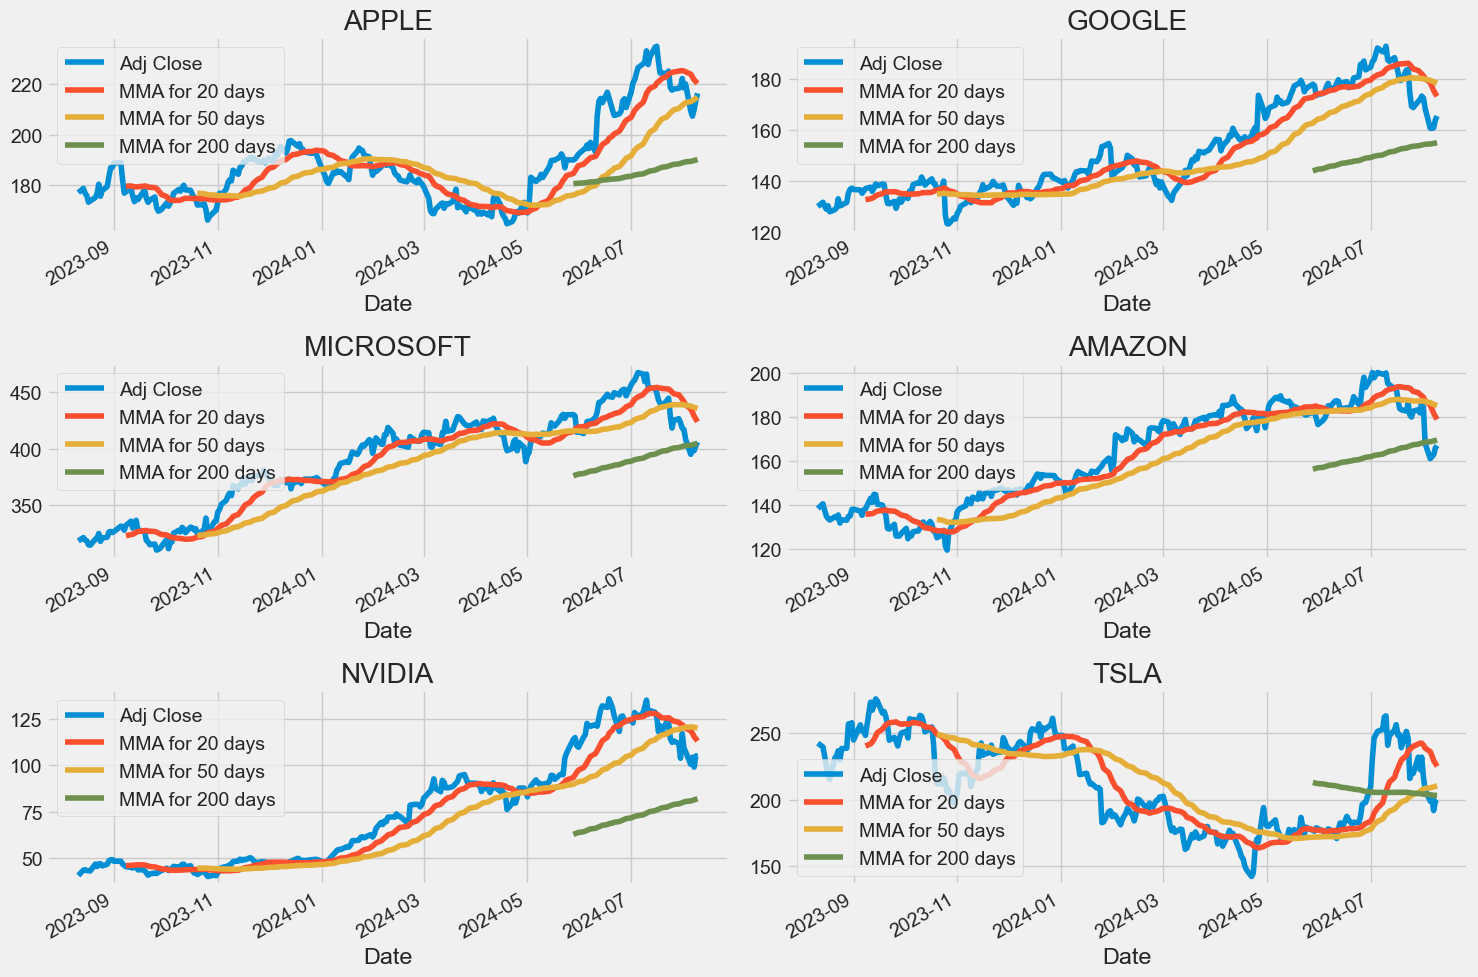

In [39]:
ma_day = [20, 50, 200]

for ma in ma_day:
    for company in company_list:
        column_name = f"MMA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MMA for 20 days', 'MMA for 50 days', 'MMA for 200 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MMA for 20 days', 'MMA for 50 days', 'MMA for 200 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MMA for 20 days', 'MMA for 50 days', 'MMA for 200 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MMA for 20 days', 'MMA for 50 days', 'MMA for 200 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

NVDA[['Adj Close', 'MMA for 20 days', 'MMA for 50 days', 'MMA for 200 days']].plot(ax=axes[2,0])
axes[2,0].set_title('NVIDIA')

TSLA[['Adj Close', 'MMA for 20 days', 'MMA for 50 days', 'MMA for 200 days']].plot(ax=axes[2,1])
axes[2,1].set_title('TSLA')

fig.tight_layout()

Nous allons maintenant analyser le risque pour les 6 titres choisis. 

>Pour ce faire, nous devrons examiner de plus près pour chacun des titres les variations quotidiennes du prix de clôture ajusté, et pas seulement sa valeur absolue. 

>Nous utilisons pandas pour récupérer les rendements quotidiens des 6 titres via la fonction pct_change qui permettra de calculer par la variation fractionnaire par rapport à la ligne immédiatement précédente. Ceci est utile pour comparer la fraction de changement dans une série temporelles d’éléments.

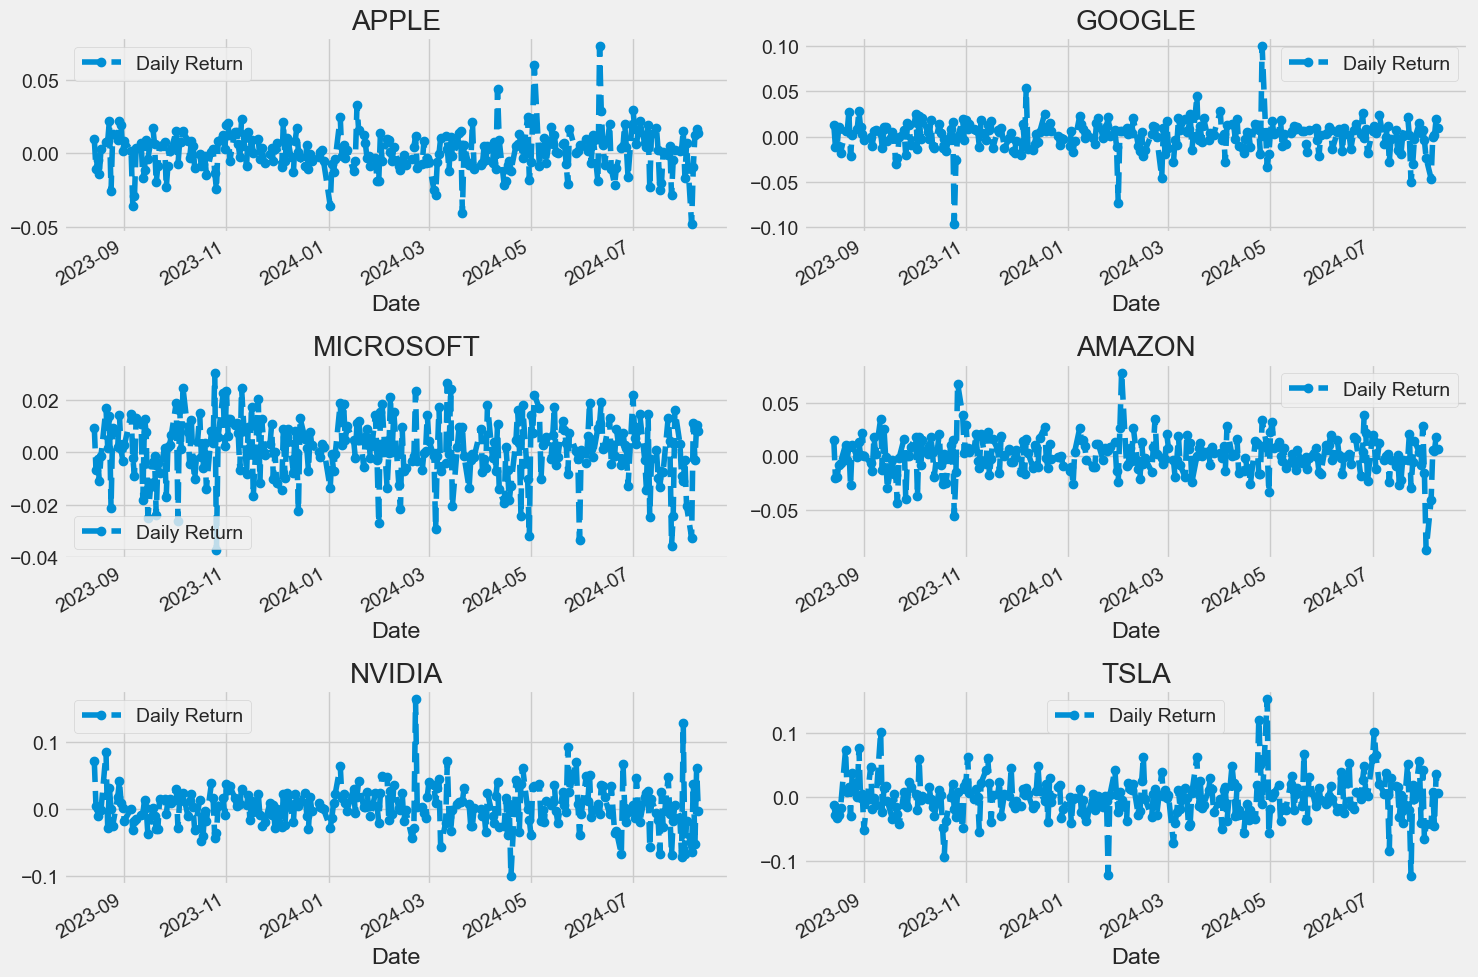

In [40]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

NVDA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('NVIDIA')

TSLA['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('TSLA')

fig.tight_layout()

Nous analysons maintenant le rendement quotidien moyen du prix de clôture ajusté à l'aide d'un histogramme pour l'ensemble des 6 titres.

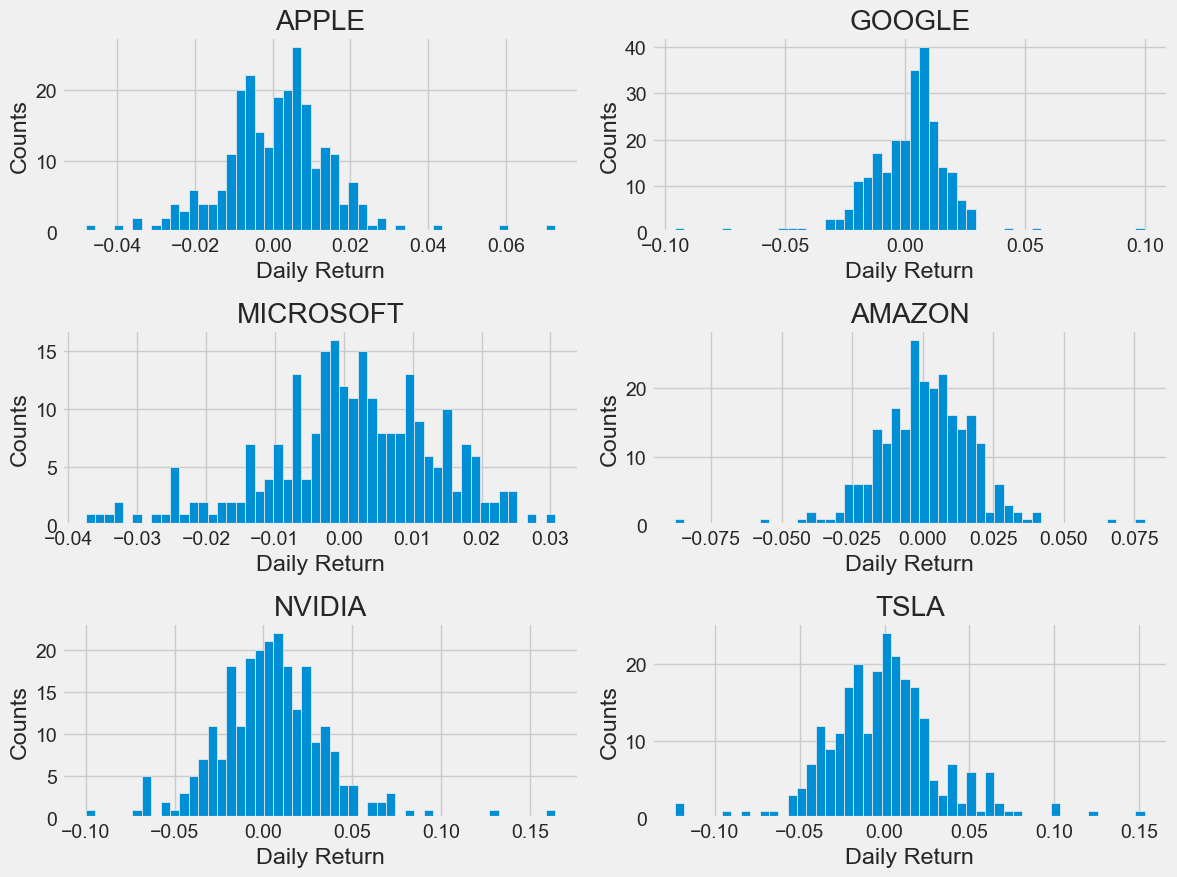

In [41]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Nous allons maintenant analyser la corrélation entre les cours de clôture ajustés des différents titres.

La corrélation est une statistique qui mesure le degré de déplacement de deux variables l'une par rapport à l'autre, dont la valeur doit être comprise entre -1,0 et +1,0. La corrélation mesure l’association, mais ne montre pas si x provoque y ou vice versa.

Afin de nous permettre d'analyser la corrélation des rendements de toutes les titres de notre liste, nous récupérons tous les cours de clôture ajusté (toutes les colonnes ['Adj Close']) de la liste des titres dans un seul DataFrame et appliquons la fonction pct_change.

In [42]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
Date,,,,,,
2023-08-11,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-14,0.009393,0.015606,0.012753,0.009439,0.070934,-0.011910
2023-08-15,-0.011200,-0.020630,-0.011833,-0.006728,0.004274,-0.028362
2023-08-16,-0.004959,-0.018886,-0.008905,-0.002429,-0.010332,-0.031593
2023-08-17,-0.014555,-0.008070,0.010456,-0.010986,-0.003265,-0.028280


Nous pouvons désormais comparer le pourcentage de rendement quotidien de deux titres pour vérifier leur corrélation. 
Voyons d'abord un titre par rapport à lui-même.

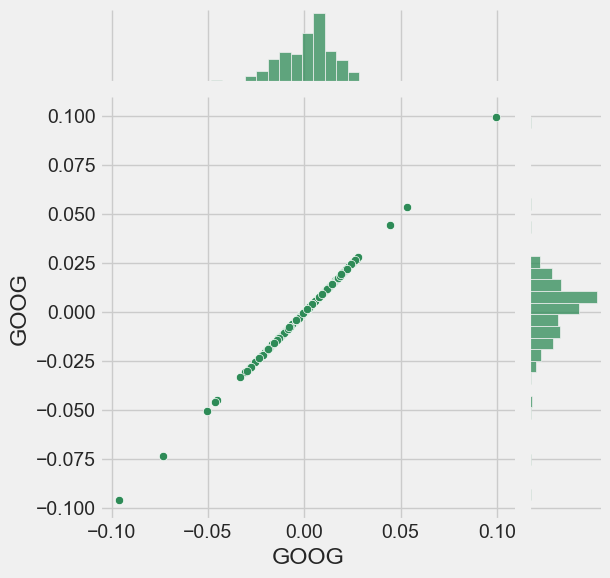

In [43]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

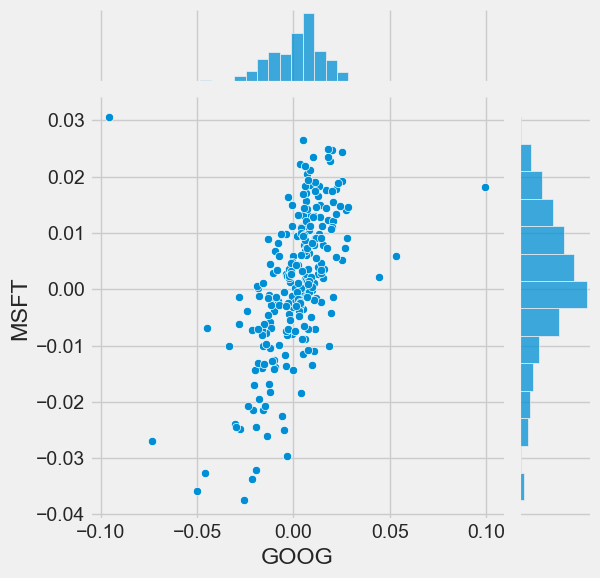

In [44]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Nous pouvons maintenant voir que si deux titres sont parfaitement corrélés entre eux, une relation linéaire entre leurs valeurs de rendement quotidien devrait se produire.

Seaborn et les pandas permettent de répéter très facilement cette analyse comparative pour chaque combinaison possible dans notre liste de titres. Nous pouvons utiliser sns.pairplot() pour créer automatiquement ce tracé.

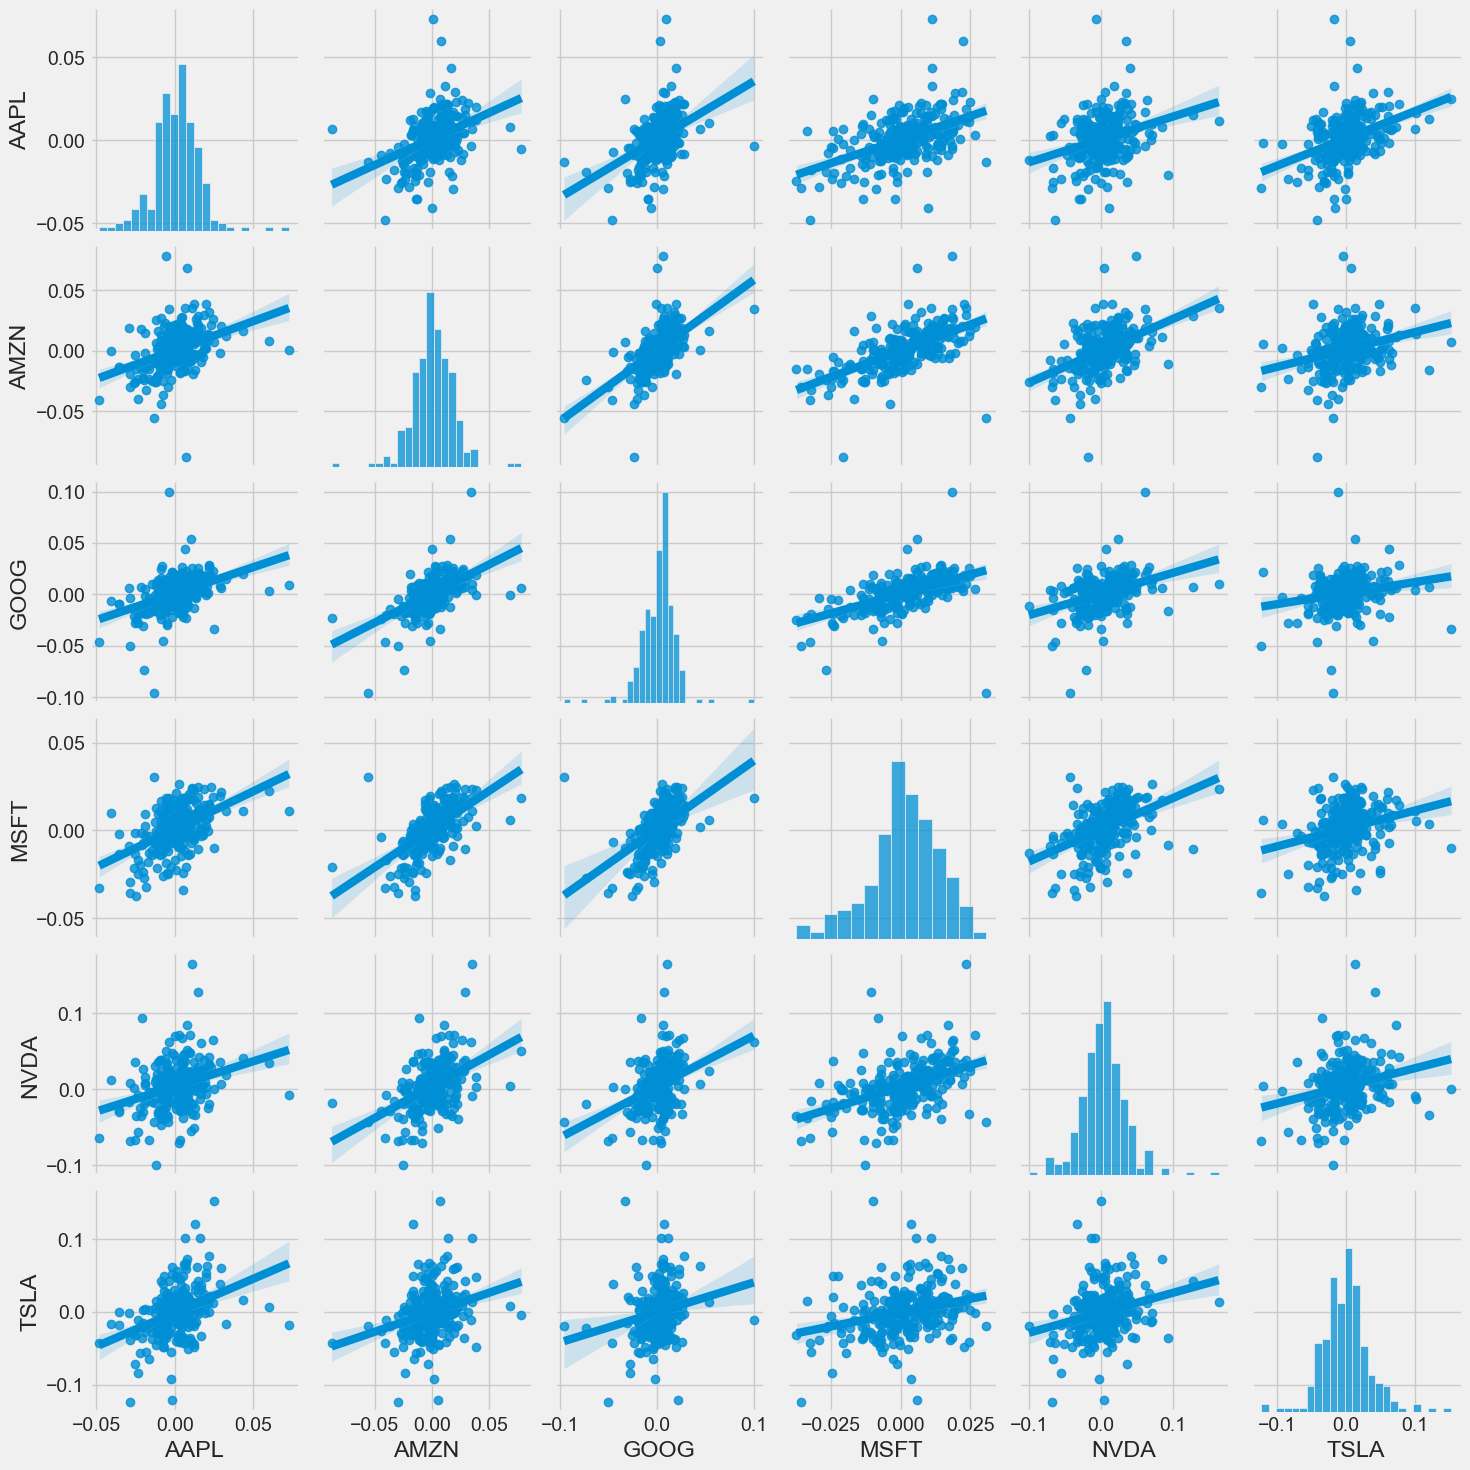

In [45]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Ci-dessus, nous pouvons voir toutes les relations sur les rendements quotidiens entre toutes les titres. Un rapide coup d’œil montre une corrélation intéressante entre les rendements quotidiens de Google GOOG et d’Amazon AMZN. Il pourrait être intéressant d’enquêter sur cette comparaison individuelle.

Bien que la simplicité d'appeler simplement sns.pairplot() soit fantastique, nous pouvons également utiliser sns.PairGrid() pour un contrôle total de la figure, y compris le type de tracés qui se trouvent dans la diagonale, le triangle supérieur et le triangle inférieur. Vous trouverez ci-dessous un exemple d'utilisation de toute la puissance de Seaborn pour obtenir ce résultat.

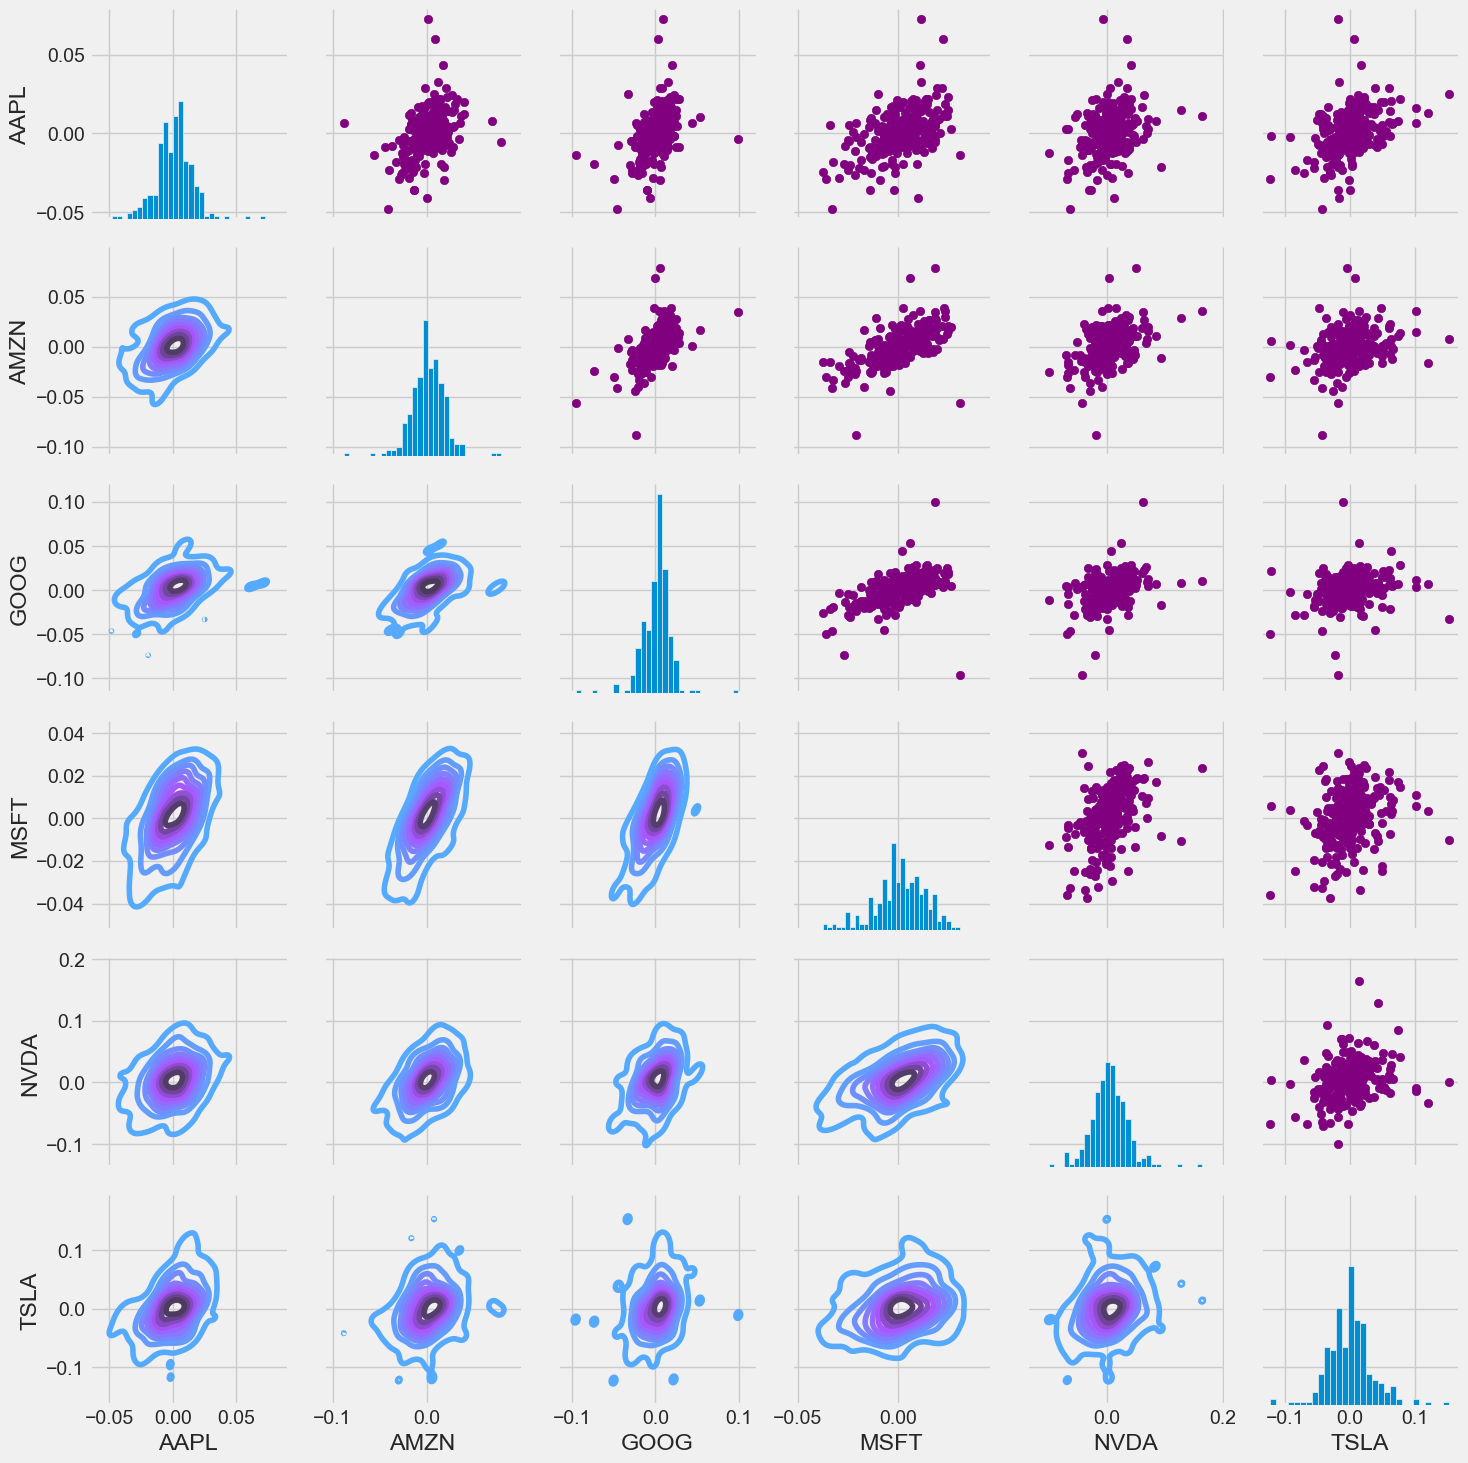

In [46]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Enfin, nous pouvons également réaliser un graphique de corrélation, pour obtenir des valeurs numériques réelles de la corrélation entre les valeurs de rendement quotidien des titres. En comparant les cours de clôture ajustés, on constate une relation intéressante entre Microsoft et Apple.

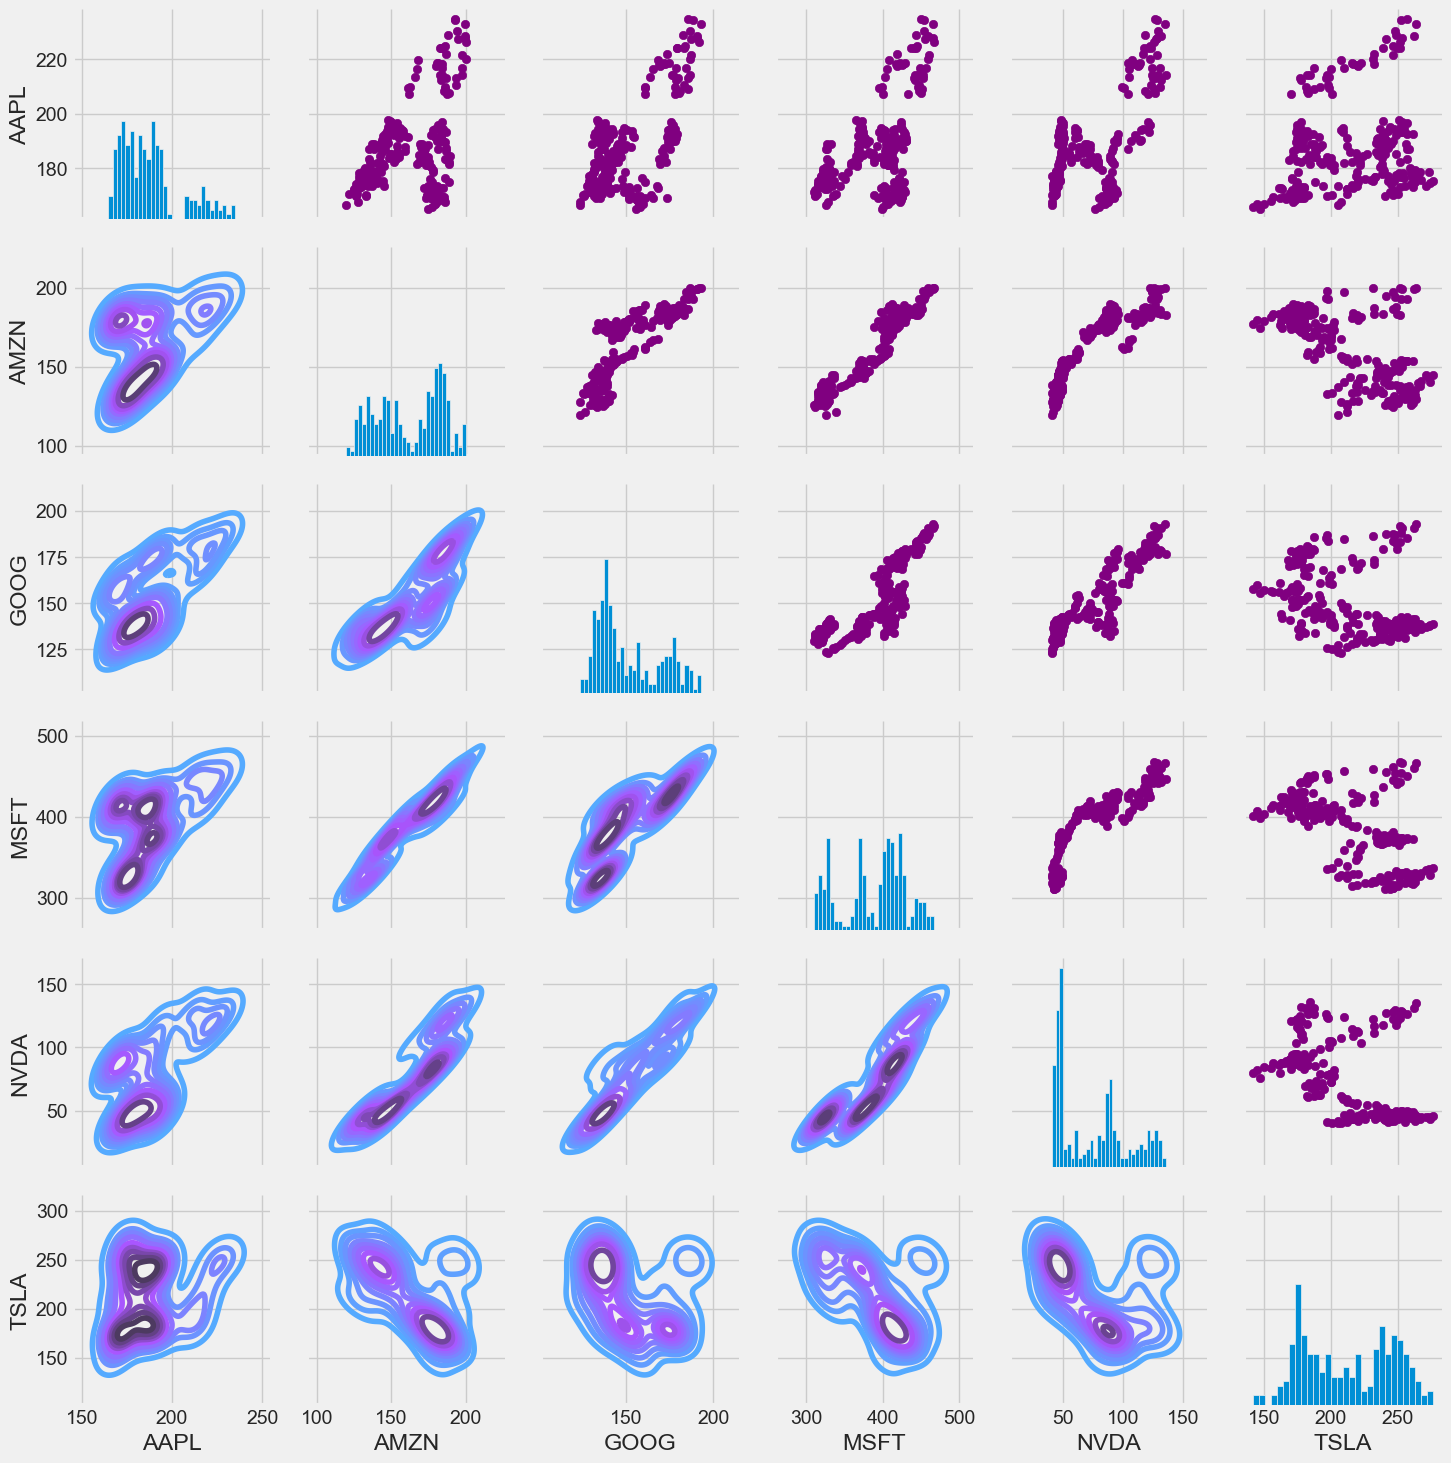

In [47]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Tout comme nous le soupçonnions dans notre PairPlot, nous voyons ici numériquement et visuellement que Microsoft MSFT et Amazon AMZN avaient la plus forte corrélation entre le rendement boursier quotidien. Il est également intéressant de constater que la grande majorité des entreprises technologiques sélectionnées sont positivement corrélées.

Text(0.5, 1.0, 'Correlation of stock closing price')

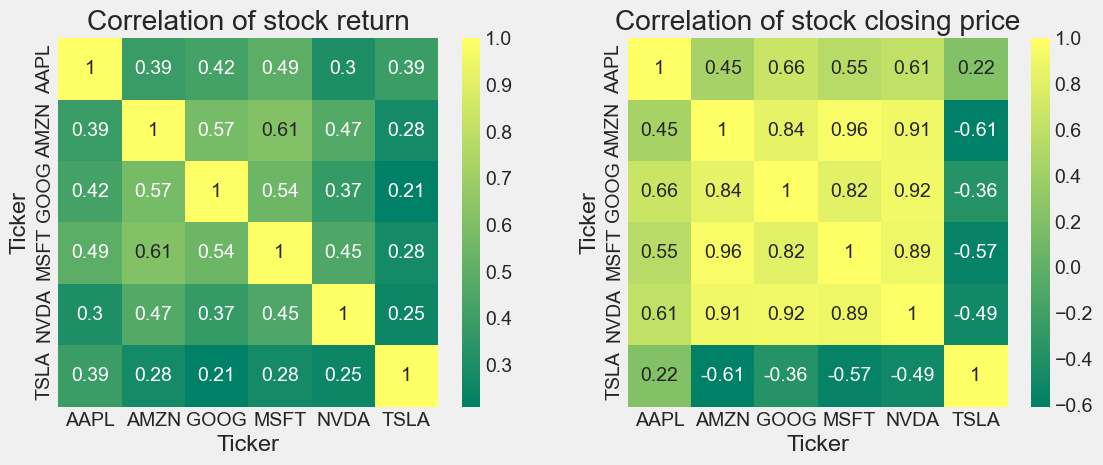

In [48]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 4. 📦 Sélection du titre en vue de prédire son prix de clôture 

Pamis les titres analysés, comment identifier le titre le moins à risque en vue d’effectuer une prédiction du prix de clôture ?

Il existe de nombreuses façons de quantifier le risque. L'une des méthodes les plus élémentaires pour utiliser les données que nous avons recueillies sur les rendements quotidiens en pourcentage consiste à comparer le rendement attendu avec l'écart type des rendements quotidiens.

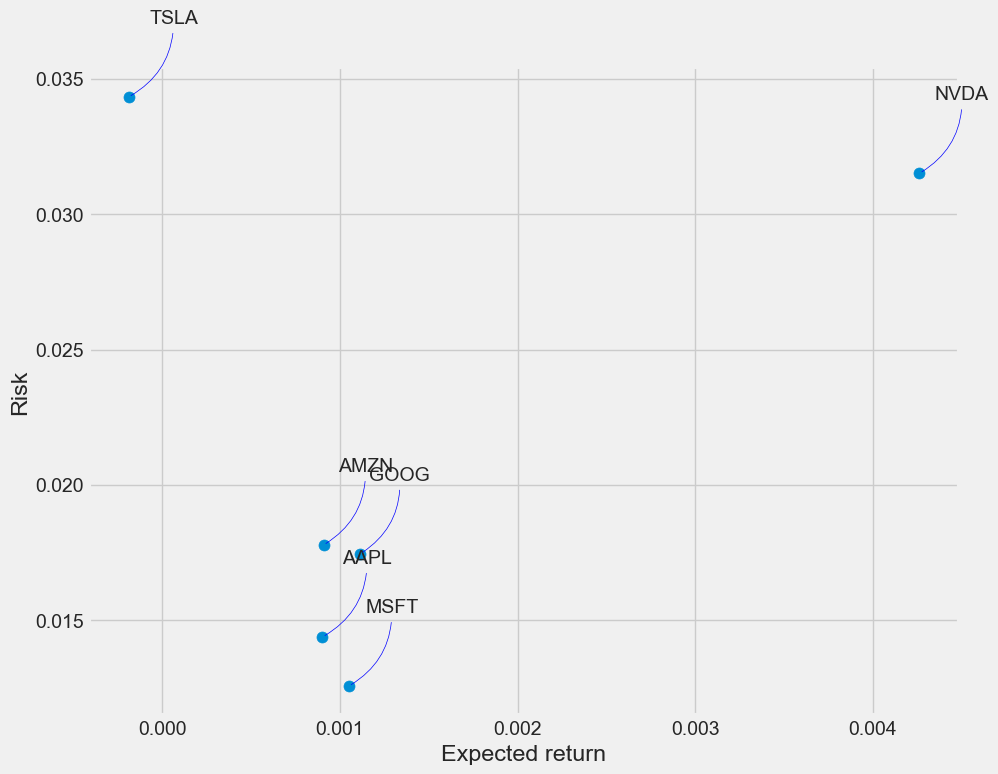

In [49]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Dès lors, nous allons sélectionner le titre le moins risqué Microsoft MSFT pour effectuer une prédiction de son prix de clôture en utilisant l'algorithme d'apprentissage automatique LTSM (Long Short-Term Memory).

Pour ce faire, les données utilisées seront les prix historiques de clôture du titre obtenu via yahoo finance depuis le 1er janvier 2012.

In [50]:
# Get the stock quote
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.200521,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.699440,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.921198,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.261726,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,21.968706,59706800
...,...,...,...,...,...,...
2024-08-05,389.170013,401.040009,385.579987,395.149994,395.149994,40709200
2024-08-06,400.000000,405.670013,398.500000,399.609985,399.609985,24946500
2024-08-07,408.640015,410.079987,397.470001,398.429993,398.429993,20650900


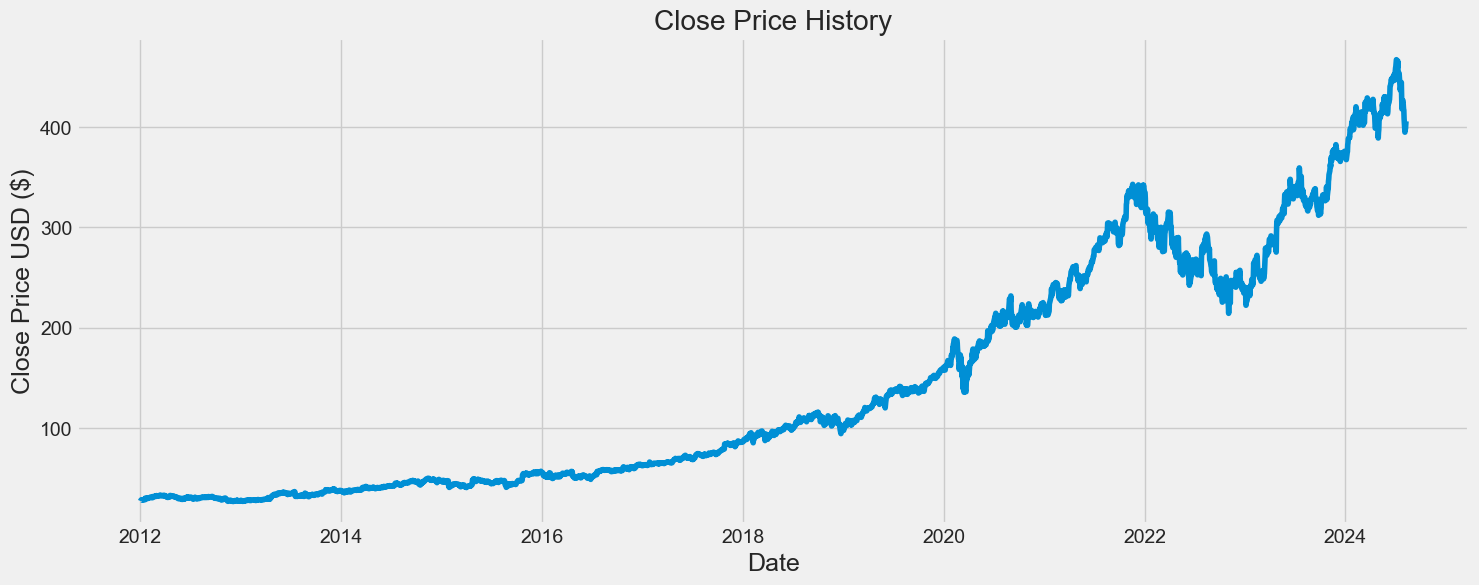

In [51]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# 5. Feature Engineering 

Nous commençons par transformer notre dataset composé des données historiques des prix de clôture du titre en le normalisant via la fonction MinMaxScaler.

In [52]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3013

In [53]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00090664],
       [0.00233459],
       [0.00296924],
       ...,
       [0.84331013],
       [0.85296585],
       [0.86051359]])

Nous créons ensuite les données d'entrainement du modèle formée de 95% des valeur du dataset contenant les prix de clôture du titre normalisés.

In [54]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00090664, 0.00233459, 0.00296924, 0.00394388, 0.00310524,
       0.0033319 , 0.0030599 , 0.00369455, 0.0042612 , 0.00428387,
       0.00421587, 0.00396655, 0.00757043, 0.00761576, 0.00673179,
       0.00723044, 0.00709445, 0.00648246, 0.00734377, 0.00716245,
       0.00797842, 0.00811442, 0.00877173, 0.00868107, 0.00902106,
       0.0097237 , 0.00997303, 0.00936104, 0.00954237, 0.0087944 ,
       0.00834107, 0.01115166, 0.01106099, 0.01149165, 0.01110633,
       0.01133299, 0.01158231, 0.01128765, 0.01246628, 0.01217162,
       0.01341826, 0.01294227, 0.01230762, 0.01176364, 0.01239828,
       0.0127836 , 0.01273827, 0.01285161, 0.01427956, 0.01450622,
       0.01468754, 0.0141209 , 0.01321426, 0.01273827, 0.01255695,
       0.01276094, 0.0127836 , 0.01409823, 0.01393957, 0.01319159])]
[0.013032929430421614]

[array([0.00090664, 0.00233459, 0.00296924, 0.00394388, 0.00310524,
       0.0033319 , 0.0030599 , 0.00369455, 0.0042612 , 0.00428387,
       0.00421587, 0.00396655, 0.0

# 6. 📈 Modélisation et entraînenement du Modèle via algorithme d'apprentissage LSTM

Nous créons ensuite la modélisation du réseau LSTM (Long Short-Term Memory) qui est une variation du réseau RNN (Recurent Neural Networks) via l'API de Deep Learning Keras.


In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2953/2953 ━━━━━━━━━━━━━━━━━━━━ 63s 21ms/step - loss: 0.0030


# 7. Evaluation du modèle

Nous créons ensuite les données de test en vue de permettre d'obtenir la prédiction des prix de clôture du titre permettant d'évaluer le modèle.

In [56]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


13.845759838204776

Nous affichons ensuite le graphique illustrant le prix de clôture du titre pour l'ensemble des données d'entraînement 'Train' et des données de test 'Test' en affichant la prédiction du prix de clôture 'Predictions' obtenu via notre modèle.

/var/folders/q1/yd35jmgd03zfvl8w0h_h2g_80000gn/T/ipykernel_58397/480816857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


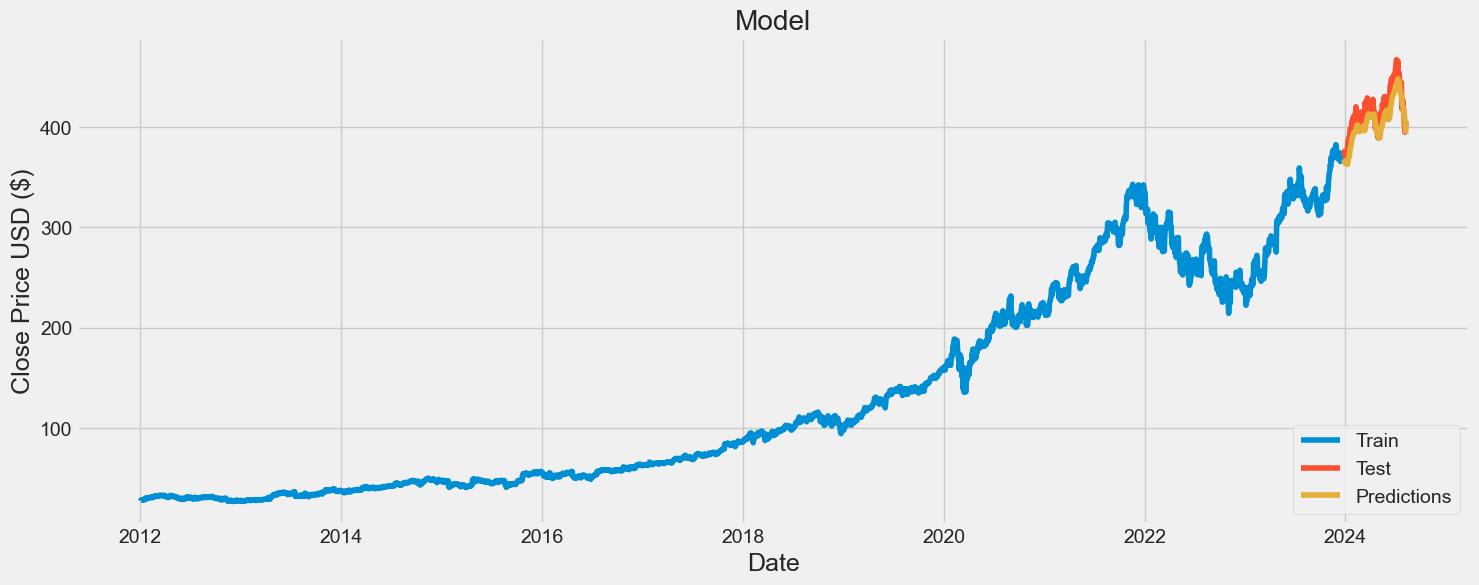

In [57]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

# 8. 📝 Interprétation des résultats et conclusion

Prédire le rendement du marché boursier est l’une des choses les plus difficiles à faire. Il y a tellement de facteurs impliqués dans la prédiction, les facteurs physiques, le comportement, rationnel et irrationnel des agents économiques. Tous ces aspects se combinent pour rendre les cours des actions volatils et très difficiles à prévoir de manière précise.

Il est donc important de noter que les prédictions du prix de clôture du titre sélectionné effectuer dans ce travail pratiquer sont effectuées sur l'ensemble de données de test et non pas sur les dates futures. Il serait donc interressant de combiner cette modélisation avec un signal d'achat ou de vente (classification) effectué sur la prédiction du prix de clôture.

En conclusion, dans ce travail pratique, nous avons pu explorer des données boursières en les chargeant du site Yahoo Finance via la librairie yfinance. Nous avons exploré et visualiser des données de séries chronologiques à l'aide des librairies Pandas, Matplotlib et Seaborn. Nous avons pu mesurer la corrélation entre les titres choisis et mesurer le risque d’investir sur un titre particulier. Dès lors nous avons pu modéliser un algorithme de type Deep Learning en vue de permettre de prédire le prix de clôture pour un titre sélectionné.